In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [2]:
df = pd.read_csv("creditcard.csv", low_memory = False)
df = df.sample(frac = 1).reset_index(drop = True)
df.head()
                                    

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,135539.0,0.022811,0.352146,0.277257,1.047408,0.871873,-0.544502,0.316577,-0.139794,-0.447481,...,-0.168732,-0.448164,0.106051,-0.633335,-0.995675,0.592678,0.179258,0.210541,6.75,0
1,36564.0,-1.781286,0.694149,1.608088,0.678813,-2.031728,0.829831,-0.614819,0.878618,-1.425568,...,-0.067366,0.218283,-0.305256,0.108223,0.104437,-0.066401,-0.331441,-0.162477,139.00,0
2,122163.0,-1.834877,0.320807,-1.196268,4.731960,-0.425649,0.962948,1.051387,0.725062,-2.568161,...,0.463147,1.343673,0.906824,0.794180,-1.044209,0.346995,0.517451,-0.329858,283.74,0
3,36336.0,1.040687,-0.104391,0.300772,1.457943,-0.340672,-0.189453,0.051428,0.053540,0.509958,...,-0.080658,-0.213478,-0.101001,0.051683,0.589961,-0.314271,0.018036,0.023897,72.26,0
4,170181.0,2.122473,-0.116350,-1.578192,0.219311,0.388255,-0.600646,0.204180,-0.278336,0.654324,...,-0.314047,-0.738352,0.149742,-0.988725,-0.057850,0.337982,-0.075843,-0.072683,9.41,0


# Feature Engineering

In [3]:
fraud = df.loc[df["Class"] == 1]
non_fraud = df.loc[df["Class"] == 0]
print(len(fraud))
print(len(non_fraud))

492
284315


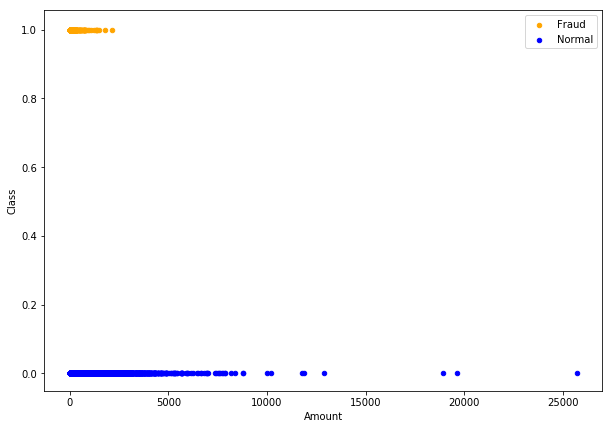

In [4]:

ax = fraud.plot.scatter(x = 'Amount', y= 'Class', color ='Orange', label = 'Fraud', figsize = (10,7))
non_fraud.plot.scatter(x ='Amount', y ='Class', color = 'Blue', label = 'Normal', ax=ax)
plt.show()

This plot shows that most of the fraud is done for the small purchases for the amount bettween 0 to 5000

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.185783e-15,3.128359e-16,-1.357022e-15,2.106712e-15,1.005593e-15,1.507505e-15,-5.577049e-16,1.253694e-16,-2.401213e-15,...,1.454448e-16,-3.567911e-16,2.803485e-16,4.475526e-15,5.559609e-16,1.684682e-15,-3.708635e-16,-1.178136e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

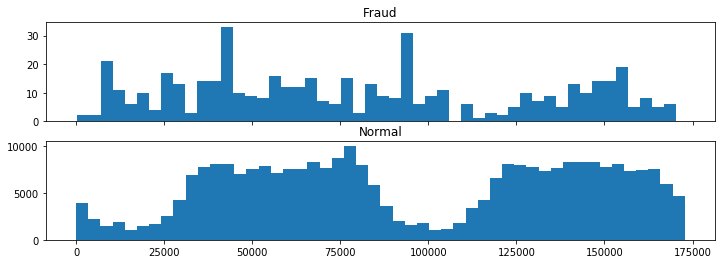

In [10]:
figure, (ax1, ax2)  = plt.subplots(2,1, sharex = True, figsize = (12,4))
ax1.hist(df.Time[df.Class ==1], bins = 50)
ax1.set_title('Fraud')
ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title('Normal')
plt.show()

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [ ]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)


In [ ]:
logistic = linear_model.LogisticRegression(C= 1e5)
logistic.fit(X_train, y_train)
print('score', logistic.score(X_test ,y_test))

In [ ]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)